In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install Prophet

In [1]:
# importing dependencies
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

Importing plotly failed. Interactive plots will not work.


In [3]:
# read in CSV data
df = pd.read_csv('C:/Users/sweir/OneDrive/Desktop/Analysis Projects/Crude_Oil_Price_Projection/ML Resources/Cleaned_Crude_Oil_Dataset.csv')
df.head()

,Date,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1/1/1986,23.0,283248,498728,12583,15459,14639,820,81.4,22.9
1,2/1/1986,15.5,256855,453209,12068,15485,14538,947,77.9,15.5
2,3/1/1986,12.6,279413,504565,11759,15485,14517,968,75.9,12.6
3,4/1/1986,12.8,265917,478339,12603,15473,14550,923,81.5,12.8
4,5/1/1986,15.3,273964,495789,13314,15484,14805,679,86.0,15.4


In [4]:
# viewing datatypes
df.dtypes

Date                                                                object
Cushing, OK Crude Oil Future Contract ($/Bar.)                     float64
U.S. Field Production of Crude Oil (1k Bar.)                         int64
Product Supplied of Crude Oil and Petroleum Products (1k Bar.)       int64
Gross Inputs to Refineries (1k Bar./Day)                             int64
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)      int64
Operating Crude Oil Distillation Capacity (1k Bar./Day)              int64
Idle Crude Oil Distillation Capacity (1k Bar./Day)                   int64
Percent Utilization of Refinery Operable Capacity                  float64
Cushing, OK WTI Spot Price FOB ($/Bar.)                            float64
dtype: object

In [5]:
# to convert the date column to type DATETIME
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# retrieving number of observations
len(df)

430

In [7]:
# renaming columns to fit naming conventions of prophet
df.rename(columns={'Date': 'ds', 'Cushing, OK Crude Oil Future Contract ($/Bar.)': 'y', 'U.S. Field Production of Crude Oil (1k Bar.)': 'total_production', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)': 'product_supplied', 'Percent Utilization of Refinery Operable Capacity': 'operable_capacity_utilization' }, inplace=True)


In [8]:
# confirming column name changes
df.dtypes

ds                                                                 datetime64[ns]
y                                                                         float64
total_production                                                            int64
product_supplied                                                            int64
Gross Inputs to Refineries (1k Bar./Day)                                    int64
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)             int64
Operating Crude Oil Distillation Capacity (1k Bar./Day)                     int64
Idle Crude Oil Distillation Capacity (1k Bar./Day)                          int64
operable_capacity_utilization                                             float64
Cushing, OK WTI Spot Price FOB ($/Bar.)                                   float64
dtype: object

In [106]:
# defining the train and testing splits
df_train=df[:323]
df_test=df[323:]

In [107]:
# saving copy of pre-transformation WTI future prices
df_train['y_original'] = df_train['y']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
df_train.head()

,ds,total_production,product_supplied,Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),operable_capacity_utilization,y,"Cushing, OK WTI Spot Price FOB ($/Bar.)",y_original
0,1986-01-01,283248,498728,12583,15459,14639,820,81.4,23.0,22.9,23.0
1,1986-02-01,256855,453209,12068,15485,14538,947,77.9,15.5,15.5,15.5
2,1986-03-01,279413,504565,11759,15485,14517,968,75.9,12.6,12.6,12.6
3,1986-04-01,265917,478339,12603,15473,14550,923,81.5,12.8,12.8,12.8
4,1986-05-01,273964,495789,13314,15484,14805,679,86.0,15.3,15.4,15.3


In [109]:
# logarithmic transformation to make data stationary/standardized
df_train['y'] = np.log(df_train['y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
# building the model 
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
m.add_regressor('total_production')
m.add_regressor('product_supplied')
m.add_regressor('operable_capacity_utilization')

model=m.fit(df)

# building out future dataframe and setting prediction parameters
future_data = model.make_future_dataframe(periods=12, freq='M')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [111]:
future = m.make_future_dataframe(periods=12,freq='M')
forecast = m.predict(future)
forecast.head()

In [112]:
df2.head()

,ds,total_production,product_supplied,Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),operable_capacity_utilization,y,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1986-01-01,283248,498728,12583,15459,14639,820,81.4,3.135494,22.9
1,1986-02-01,256855,453209,12068,15485,14538,947,77.9,2.740840,15.5
2,1986-03-01,279413,504565,11759,15485,14517,968,75.9,2.533697,12.6
3,1986-04-01,265917,478339,12603,15473,14550,923,81.5,2.549445,12.8
4,1986-05-01,273964,495789,13314,15484,14805,679,86.0,2.727853,15.4


In [113]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
532,2021-08-01,4.893593,4.598521,5.202935
533,2021-09-01,5.056124,4.756968,5.380912
534,2021-09-01,5.056124,4.726950,5.363396
535,2021-10-01,4.813627,4.514237,5.122636
536,2021-10-01,4.813627,4.505678,5.115748


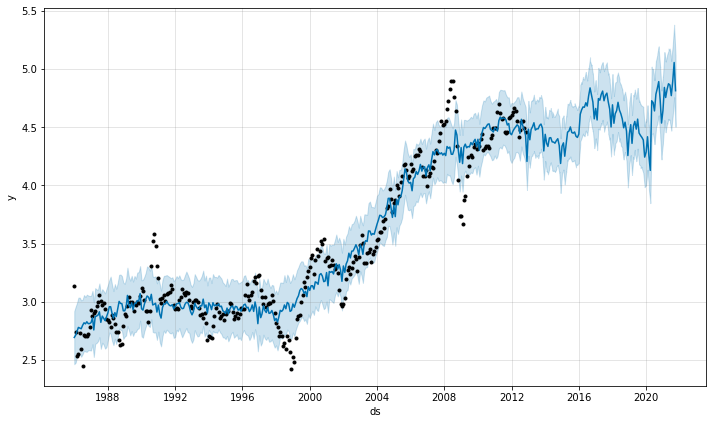

In [114]:
#initial visualization of model results
model_visualization = model.plot(forecast)

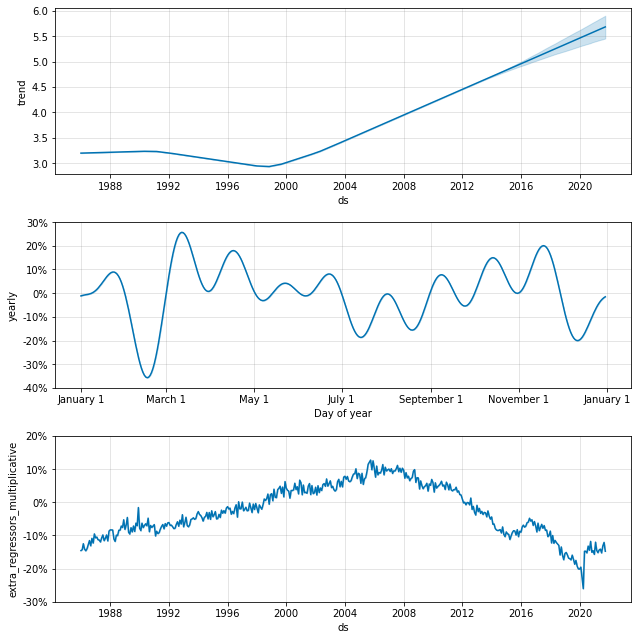

In [115]:
# plotting forecast components
forecast_components = model.plot_components(forecast)

In [116]:
# saving transformed forecast data
forecast_data_original = forecast 

# reversing logarithmic transformation for real price predications
forecast_data_original['yhat'] = np.exp(forecast_data_original['yhat'])
forecast_data_original['yhat_lower'] = np.exp(forecast_data_original['yhat_lower'])
forecast_data_original['yhat_upper'] = np.exp(forecast_data_original['yhat_upper'])

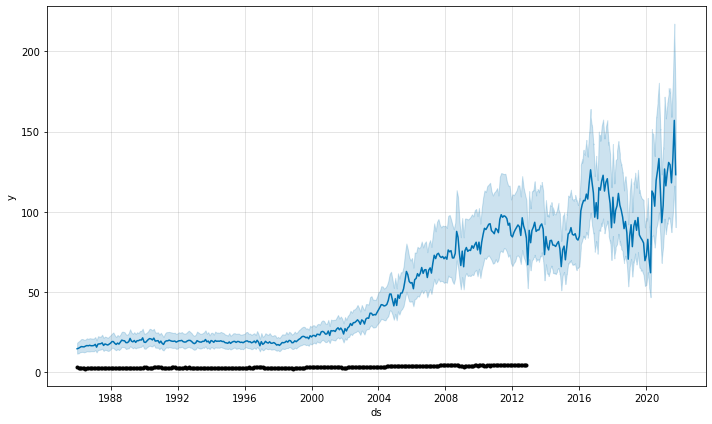

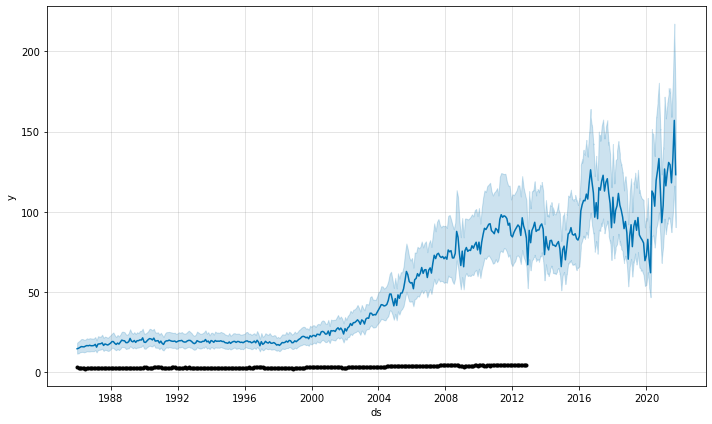

In [117]:
# plotting real price forecasts
model.plot(forecast_data_original)

In [ ]:
#comparing initial projections to test data
df_crossval = cross_validation(m, initial='1825 days', period='180 days', horizon = '365 days')
df_crossval.head()

df_mtrcs = performance_metrics(df_crossval)
df_mtrcs.head()